# Importing the Library

In [6]:
#importing the necessary packages to process or plot the dataimport numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns # used for plot interactive graph
%matplotlib inline

# Loading the Breast Cancer Datasets 

In [3]:
#Importing the Dataset from the Sklearn
cancer_data=datasets.load_breast_cancer()

In [4]:
#Data
cancer_data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [5]:
#Target value
cancer_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

1 means Malignant

0 means Bening

In [7]:
#Creating the Dataframe from the dataset
'''Features that are present in the Dataset'''
data=pd.DataFrame(np.c_[cancer_data['data'],cancer_data['target']],
                  columns= np.append(cancer_data['feature_names'], ['target']))

#Plotting First 80 Entries to get the overview of the Data
data.head(80)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,16.07,19.65,104.10,817.7,0.09168,0.08424,0.09769,0.06638,0.1798,0.05391,...,24.56,128.80,1223.0,0.1500,0.2045,0.28290,0.15200,0.2650,0.06387,0.0
76,13.53,10.94,87.91,559.2,0.12910,0.10470,0.06877,0.06556,0.2403,0.06641,...,12.49,91.36,605.5,0.1451,0.1379,0.08539,0.07407,0.2710,0.07191,1.0
77,18.05,16.15,120.20,1006.0,0.10650,0.21460,0.16840,0.10800,0.2152,0.06673,...,18.91,150.10,1610.0,0.1478,0.5634,0.37860,0.21020,0.3751,0.11080,0.0
78,20.18,23.97,143.70,1245.0,0.12860,0.34540,0.37540,0.16040,0.2906,0.08142,...,31.72,170.30,1623.0,0.1639,0.6164,0.76810,0.25080,0.5440,0.09964,0.0


In [8]:
#Calling the Describe Functions in order to get the Quantitative Analysis of the Data
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [9]:
#Getting the Info of the Dataset where it shows the Number of non-null values are present
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
#List of all the columns
data.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

# Visualization

In [9]:
'''lets divied the features according to their category''' 
features_mean= list(data.columns[1:11])
features_se= list(data.columns[11:20])
features_worst=list(data.columns[21:31])
print(features_mean)
print("-----------------------------------")
print(features_se)
print("------------------------------------")
print(features_worst)

['mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error']
-----------------------------------
['texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error']
------------------------------------
['worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension', 'target']


## Plotting the Heat Map

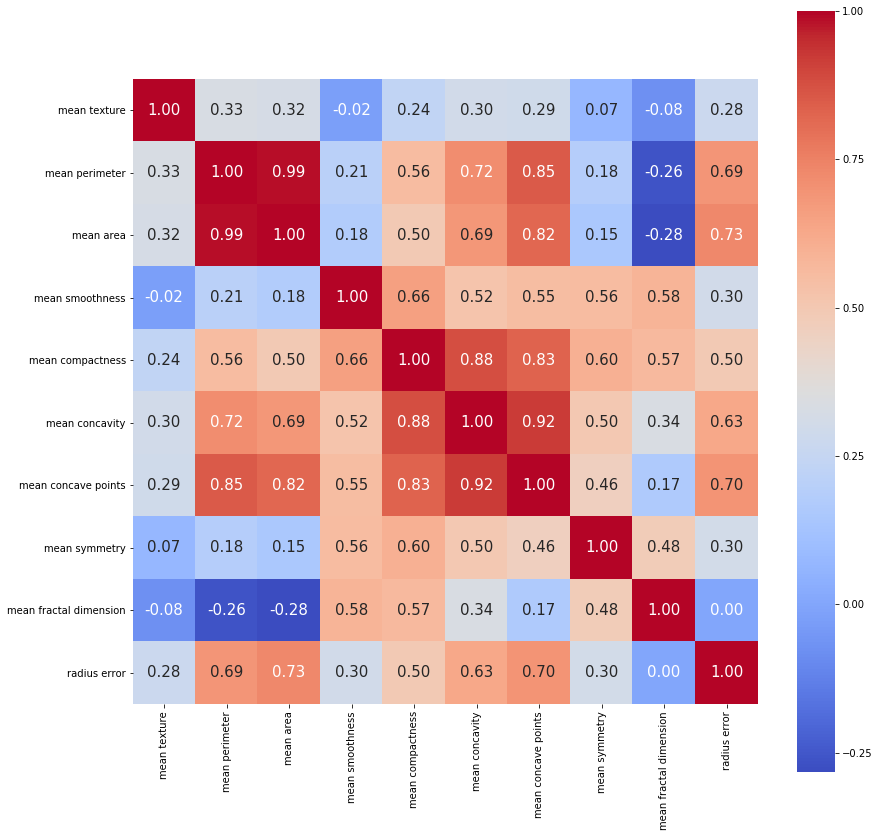

In [10]:
#lets check the correlation between features
corr = data[features_mean].corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm')

# Training and Testing Split

In [10]:
'''Here train_test_split returns the four value of train and test and also divide the data by shuffling'''
X_train,X_test,Y_train,Y_test=train_test_split(cancer_data.data,cancer_data.target,random_state=0,test_size=0.2)
#Here we have made Random as 0 in order to get the same set of Data for Train and Test after any number of times calling

In [11]:
#Shape of training data
X_train.shape,Y_train.shape

((455, 30), (455,))

In [12]:
#Shape of testing data
X_test.shape,Y_test.shape

((114, 30), (114,))

# Inbuilt KNeighborsClassifier

In [14]:
'''Getting the value of n_neighbors 
   by plotting the X_train and Y_train through different n_neighbors value(1,24) here,
   and through graph we get to know which n_neighbors suits most with 
   highest prediction'''
x_axis=[]
y_axis=[]
for i in range(1,25,2):
    #Here we are checking for the Inbuilt Classifier
    clf=KNeighborsClassifier(n_neighbors=i)
    x_axis.append(i)
    #cross_val_score return Array of scores of the estimator for each run of the cross validation.
    score=cross_val_score(clf,X_train,Y_train) 
    y_axis.append(score.mean())
    print(i,score.mean())

1 0.9274863483211341
3 0.9296648077146509
5 0.9252788428023702
7 0.9318723132334147
9 0.9318868362960381
11 0.9252788428023702
13 0.9230858603462297
15 0.9120628558150344
17 0.9120628558150344
19 0.9098553502962705
21 0.9142703613337981
23 0.916477866852562


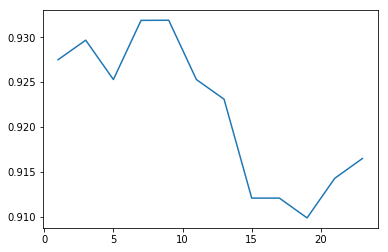

In [15]:
#Plot of the Graph
plt.plot(x_axis,y_axis)
plt.show()

In [13]:
#Here we are calling the Inbuilt Classifier with Assigned K value as 7
clf=KNeighborsClassifier(n_neighbors=7)
clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [14]:
#fitting the data
clf.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [15]:
#Prediction
Y_predict_inbuilt=clf.predict(X_test)

In [16]:
#Score of the inbuilt classifier
clf.score(X_test,Y_test)

0.9473684210526315

# Implementation of KNeighborsClassifier

In [19]:
'''As in KNeighborsClassifier there is no work perform during training period, 
   as there is only plotting of the training data is there through which we can predict'''
def train(x,y):
    return

In [20]:
'''Predicting the X_test data one by one '''
def predict_one(x_train,y_train,x_test,k):
    #distances list will save the distance of the testing data point
    #from all training data point
    distances=[]
    for i in range(len(x_train)):
        #distance store is square difference distance of given testing point
        distance=((x_train[i,:]-x_test)**2).sum()
        #in distances we will store the ith training point and it's distance from testing point
        distances.append([distance,i])
        '''Sorting the distance list as here we check the distance from 
           training point and testing point should be minimum or we check what are the 
           training point near to the give testing point'''
        distances=sorted(distances)
    targets=[]
    for i in range(k):
            #here in index_of_training we get the training point
            index_of_trainig_data=distances[i][1]
            #and we are storing the class of index_of_training
            targets.append(y_train[index_of_trainig_data])
            
            #here we are taking the most common targets and it return how many time it occur
    return Counter(targets).most_common(1)[0][0]    

In [21]:
'''Prediction function which take x_train,y_train and predict the classes for x_test_data,
   here we are also passing the k which is telling how many nearest neighbors we want to consider'''
def predict(x_train,y_train,x_test_data,k):
    predictions=[]
    for x_test in x_test_data:
        #Get the output from predict_one and storing it into the list 
        predictions.append(predict_one(x_train,y_train,x_test,k))
    return predictions

In [22]:
#Calling the predict function
y_predict=predict(X_train,Y_train,X_test,7)

In [23]:
#Getting the accuracy_score
accuracy_score(Y_test,y_predict)

0.9473684210526315

# Comparing the Score of Inbuilt and Implemented KNeighborsClassifier

In [24]:
#First one is Inbuilt and Second one is Implemented
clf.score(X_test,Y_test),accuracy_score(Y_test,y_predict)

(0.9473684210526315, 0.9473684210526315)

In [25]:
'''Classification Report for the Inbuilt Classifier'''
print(classification_report(Y_test,Y_predict_inbuilt))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        47
           1       0.96      0.96      0.96        67

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



In [26]:
'''Classification Report for the Implemented Classifier'''
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        47
           1       0.96      0.96      0.96        67

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



### Show it is clearly visible that Inbuilt KNeighborsClassifier and Implemented KNeighborsClassifier are having same score for the same value of the K